<a href="https://colab.research.google.com/github/Annie-Yeeun-Jang/Plant_disease_classification/blob/master/%E1%84%89%E1%85%A5%E1%86%BC%E1%84%82%E1%85%B3%E1%86%BC%E1%84%91%E1%85%A7%E1%86%BC%E1%84%80%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction (Baseline1 & Baseline2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, Activation, Dropout, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dst_path = '/content/gdrive/My Drive/dataset_split_aug' #test데이터 들어있는 폴더
# 경로 지정
import os
os.chdir('/content/gdrive/My Drive/dataset_split_aug')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
test_dir = os.path.join(dst_path, 'test') #test데이터 폴더 경로지정 (predict위한)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        shuffle = False,
        class_mode='categorical',
        batch_size=64)

Found 7989 images belonging to 33 classes.


In [ ]:
# augmentation된 데이터로 훈련한 baseline1 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_aug_1')
filepath = 'baseline1_aug.h5'
loaded_model1=load_model(filepath)
predict1 = loaded_model1.predict_generator(test_generator)

In [ ]:
# raw 데이터로 훈련한 baseline1 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_raw_1')
filepath2 = 'baseline1_raw.h5'
loaded_model2=load_model(filepath2)
predict2 = loaded_model2.predict_generator(test_generator)

In [ ]:
# augmentation된 데이터로 훈련한 baseline2 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_aug_2')
filepath3 = 'baseline2_aug.h5'
loaded_model3=load_model(filepath3)
predict3 = loaded_model3.predict_generator(test_generator)

In [ ]:
# raw 데이터로 훈련한 baseline2 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_raw_2')
filepath4 = 'baseline2_raw.h5'
loaded_model4=load_model(filepath4)
predict4 = loaded_model4.predict_generator(test_generator)

In [ ]:
# DenseNet 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/dense')
filepath5 = 'DenseNet.h5'
loaded_model5=load_model(filepath5)
predict5 = loaded_model5.predict_generator(test_generator)

In [ ]:
# DenseNet Freeze 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/dense_freeze')
filepath6 = 'DenseNet_freeze.h5'
loaded_model6=load_model(filepath6)
predict6 = loaded_model6.predict_generator(test_generator)

In [ ]:
# ResNet 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/resnet')
filepath7 = 'ResNet.hdf5'
loaded_model7=load_model(filepath7)
predict7 = loaded_model7.predict_generator(test_generator)

In [ ]:
predict1.shape

(7989, 33)

# Confusion Matrix (Baseline1, 2) (Augmentation vs. Raw)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

**Baseline1 with Augmented Data**

Text(0.5, 324.5937499999999, 'Predicted')

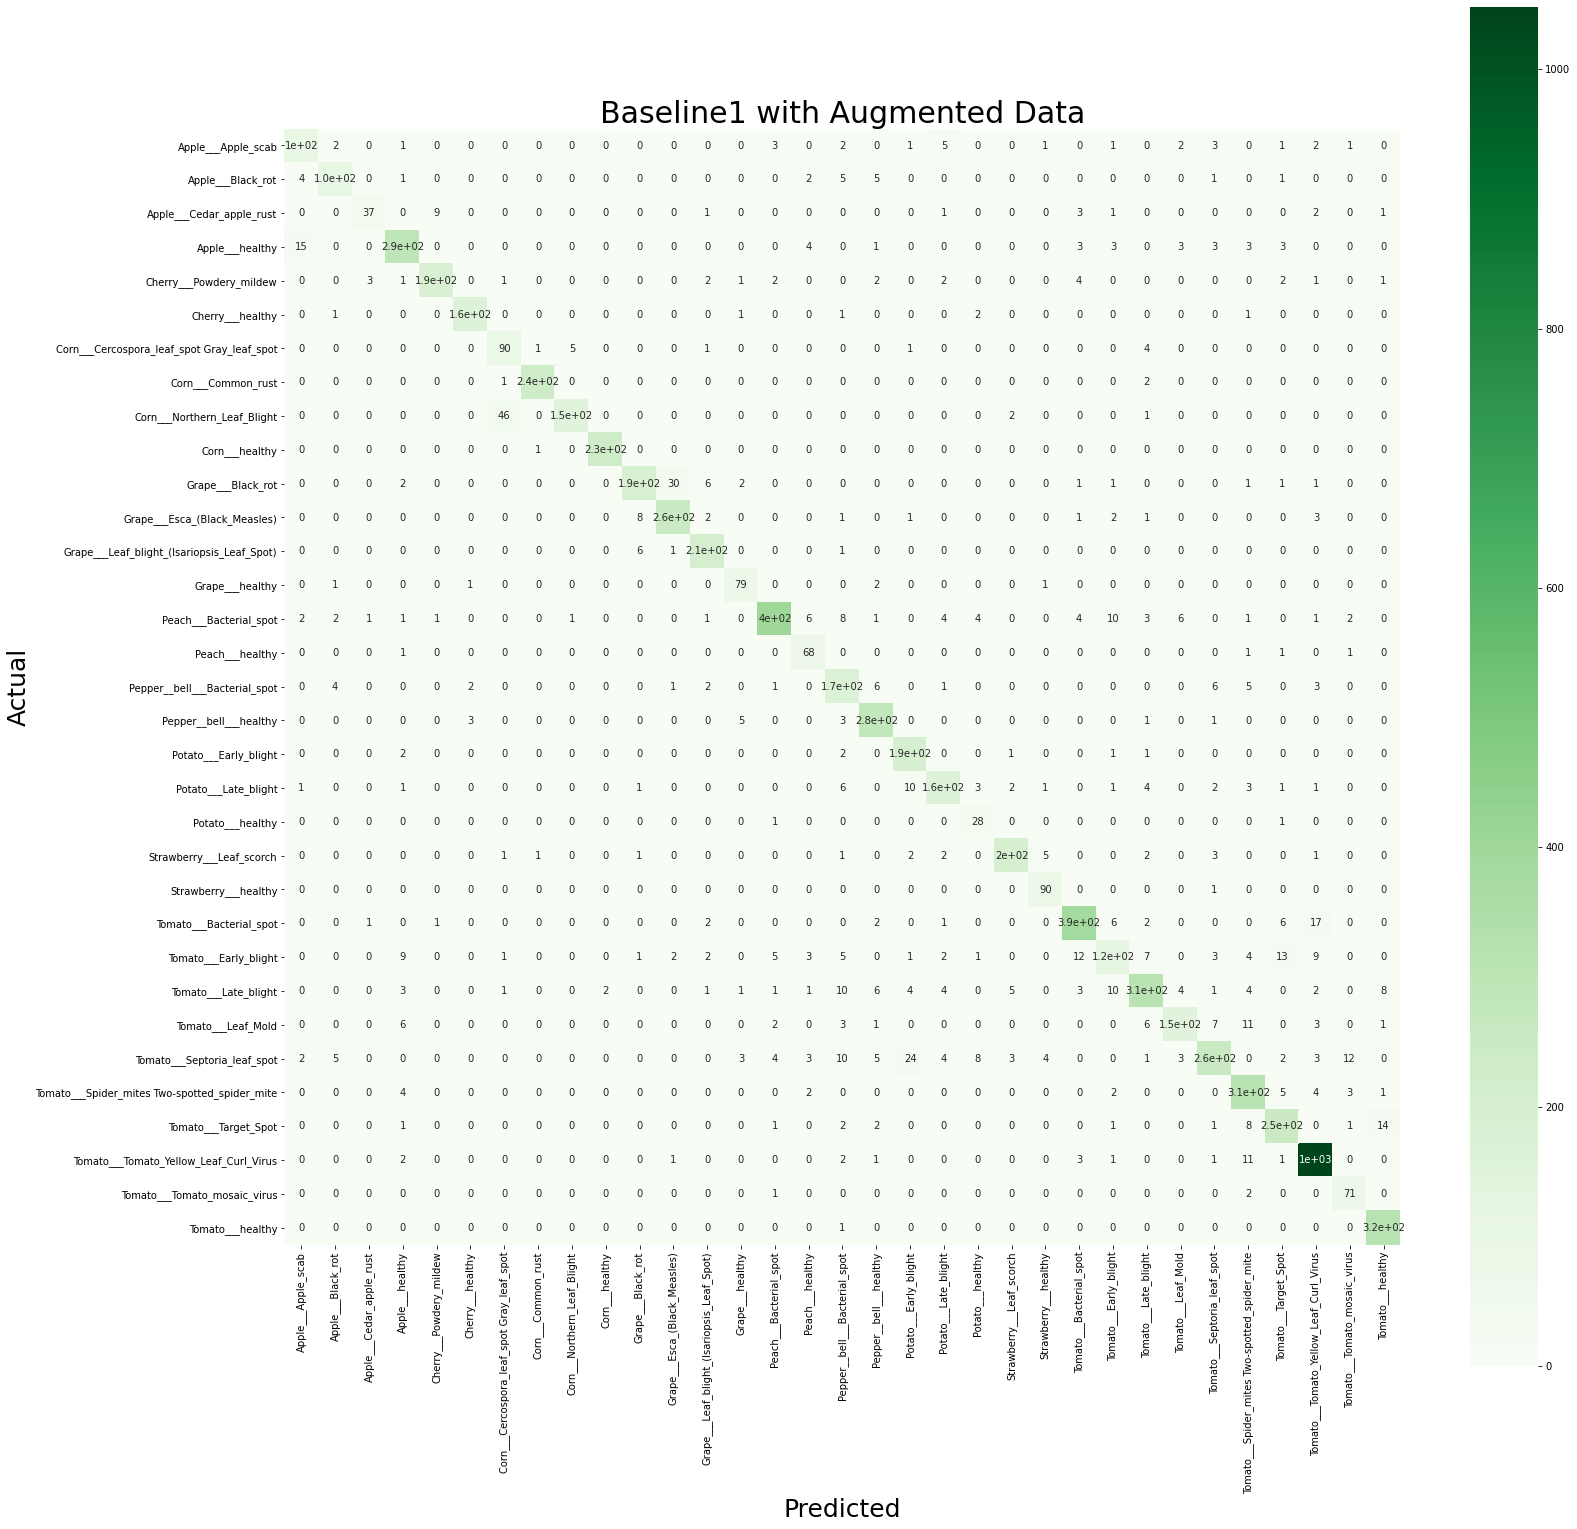

In [ ]:
y_pred1 = np.argmax(predict1, axis=-1) # 모델이 예측한 class label
classes = test_generator.classes[test_generator.index_array] # ground truth 

# 총 33개 클래스
class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred1)
plt.figure(figsize=(25, 25))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax.set_title("Baseline1 with Augmented Data", fontsize=30)
ax.set_ylabel('Actual', fontsize=25)
ax.set_xlabel('Predicted', fontsize=25)

**Baseline1 with Raw Data**

Text(0.5, 324.5937499999999, 'Predicted')

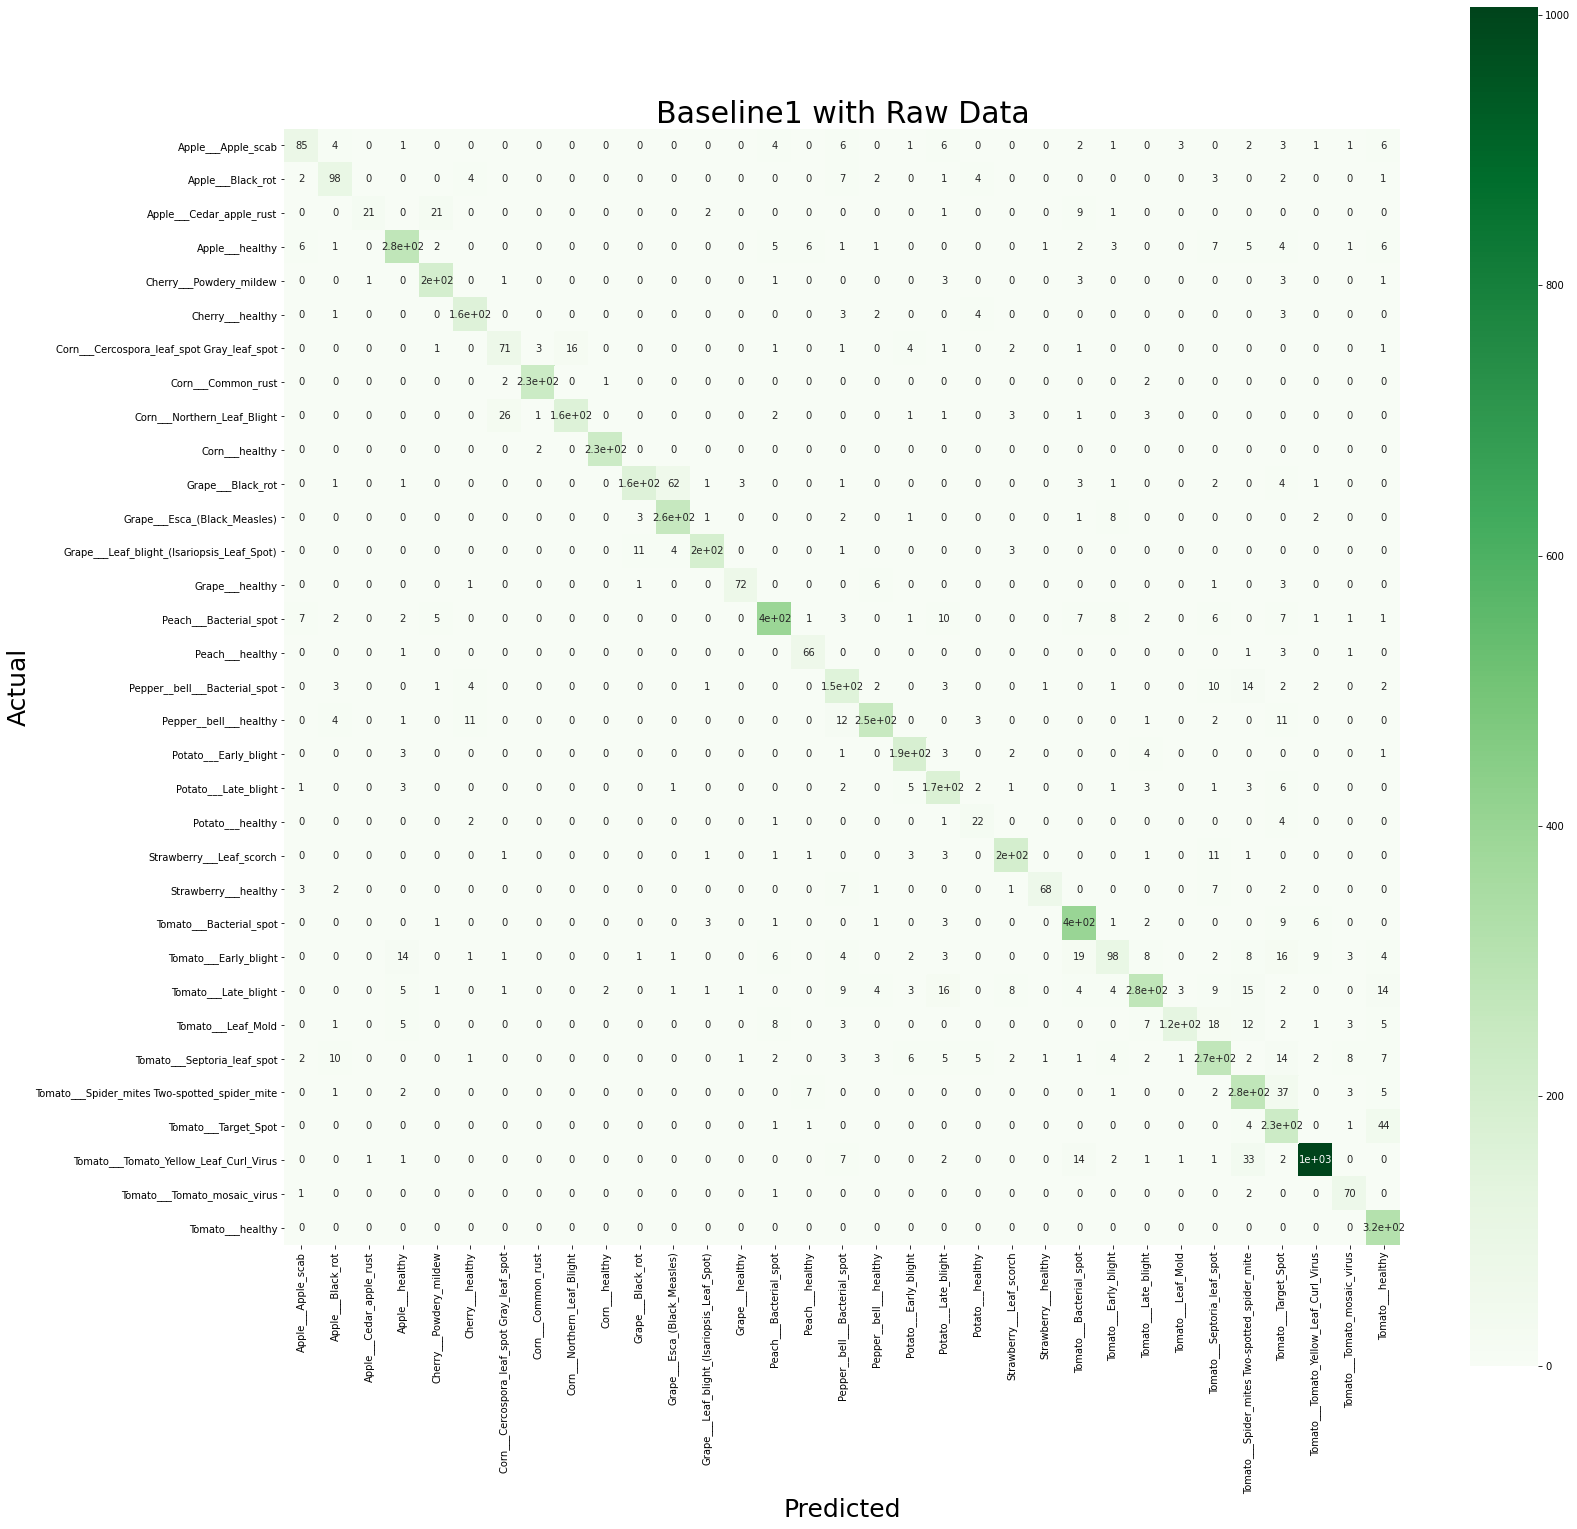

In [ ]:
y_pred2 = np.argmax(predict2, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred2)
plt.figure(figsize=(25, 25))
ax2 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax2.set_title("Baseline1 with Raw Data", fontsize=30)
ax2.set_ylabel('Actual', fontsize=25)
ax2.set_xlabel('Predicted', fontsize=25)

**Baseline2 with Augmented Data**

Text(0.5, 324.5937499999999, 'Predicted')

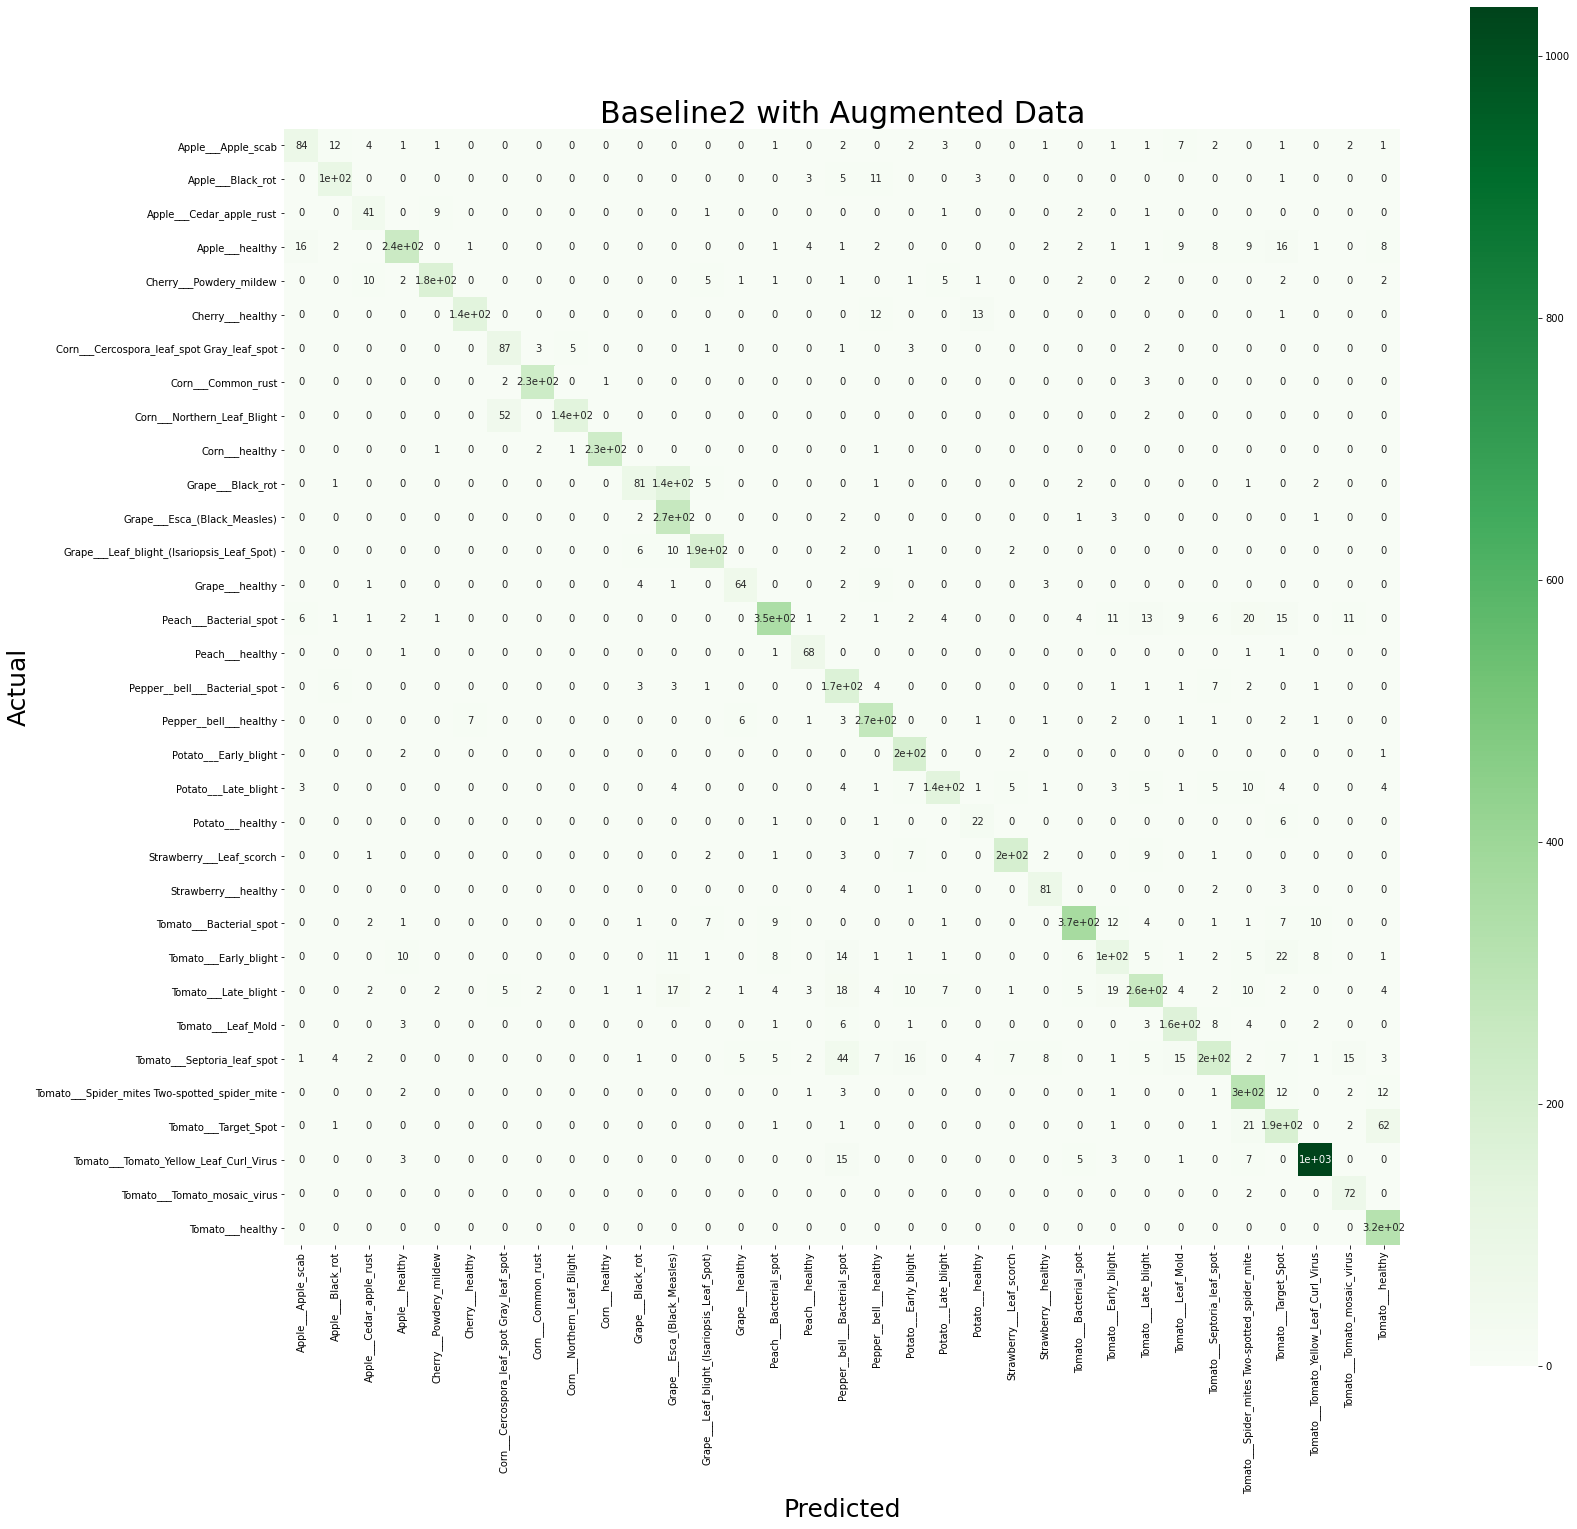

In [ ]:
y_pred3 = np.argmax(predict3, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred3)
plt.figure(figsize=(25, 25))
ax3 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax3.set_title("Baseline2 with Augmented Data", fontsize=30)
ax3.set_ylabel('Actual', fontsize=25)
ax3.set_xlabel('Predicted', fontsize=25)

**Baseline2 with Raw Data**

Text(0.5, 324.5937499999999, 'Predicted')

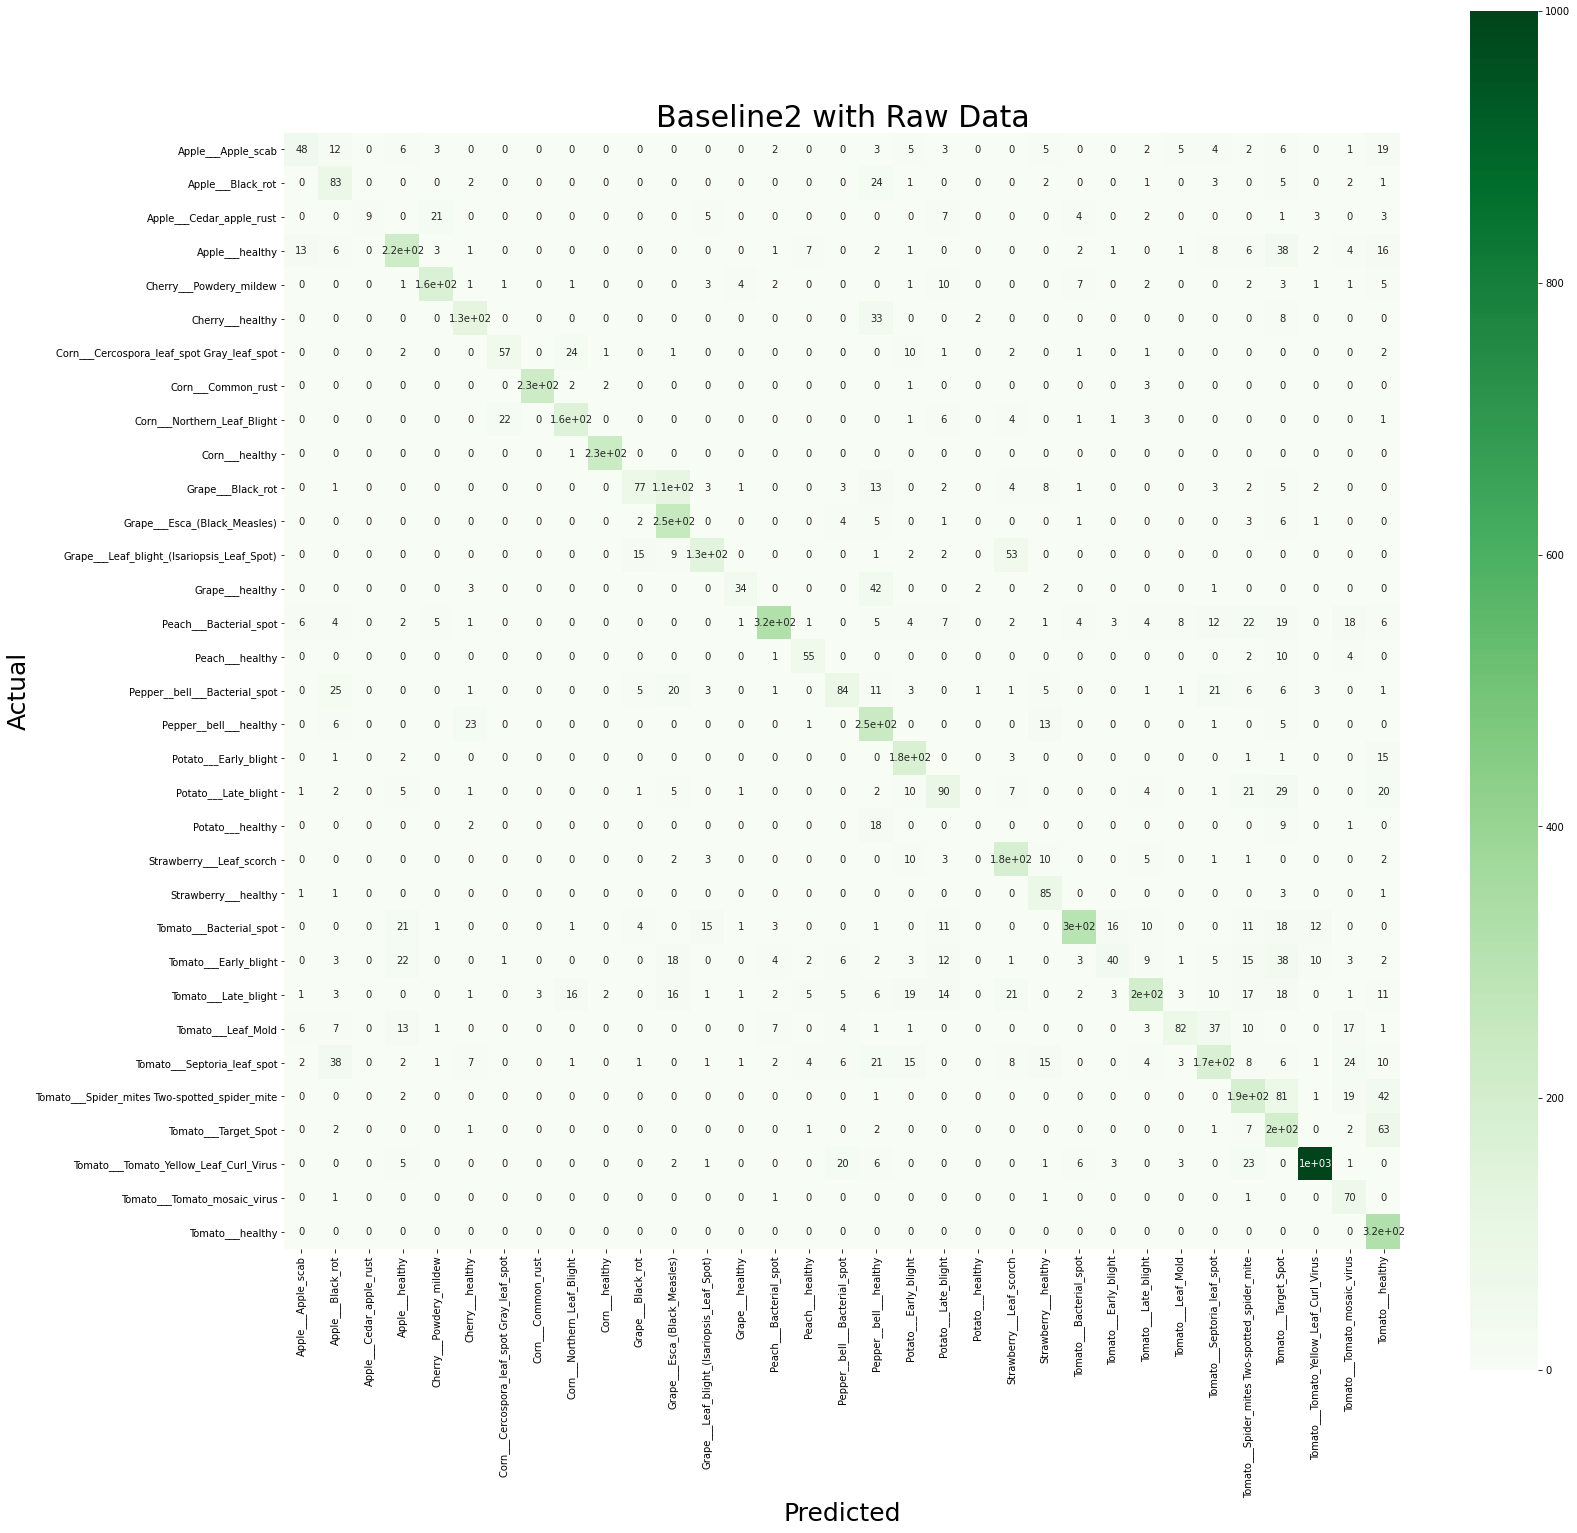

In [ ]:
y_pred4 = np.argmax(predict4, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred4)
plt.figure(figsize=(25, 25))
ax4 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax4.set_title("Baseline2 with Raw Data", fontsize=30)
ax4.set_ylabel('Actual', fontsize=25)
ax4.set_xlabel('Predicted', fontsize=25)

**Dense**

Text(0.5, 523.3999999999999, 'Predicted')

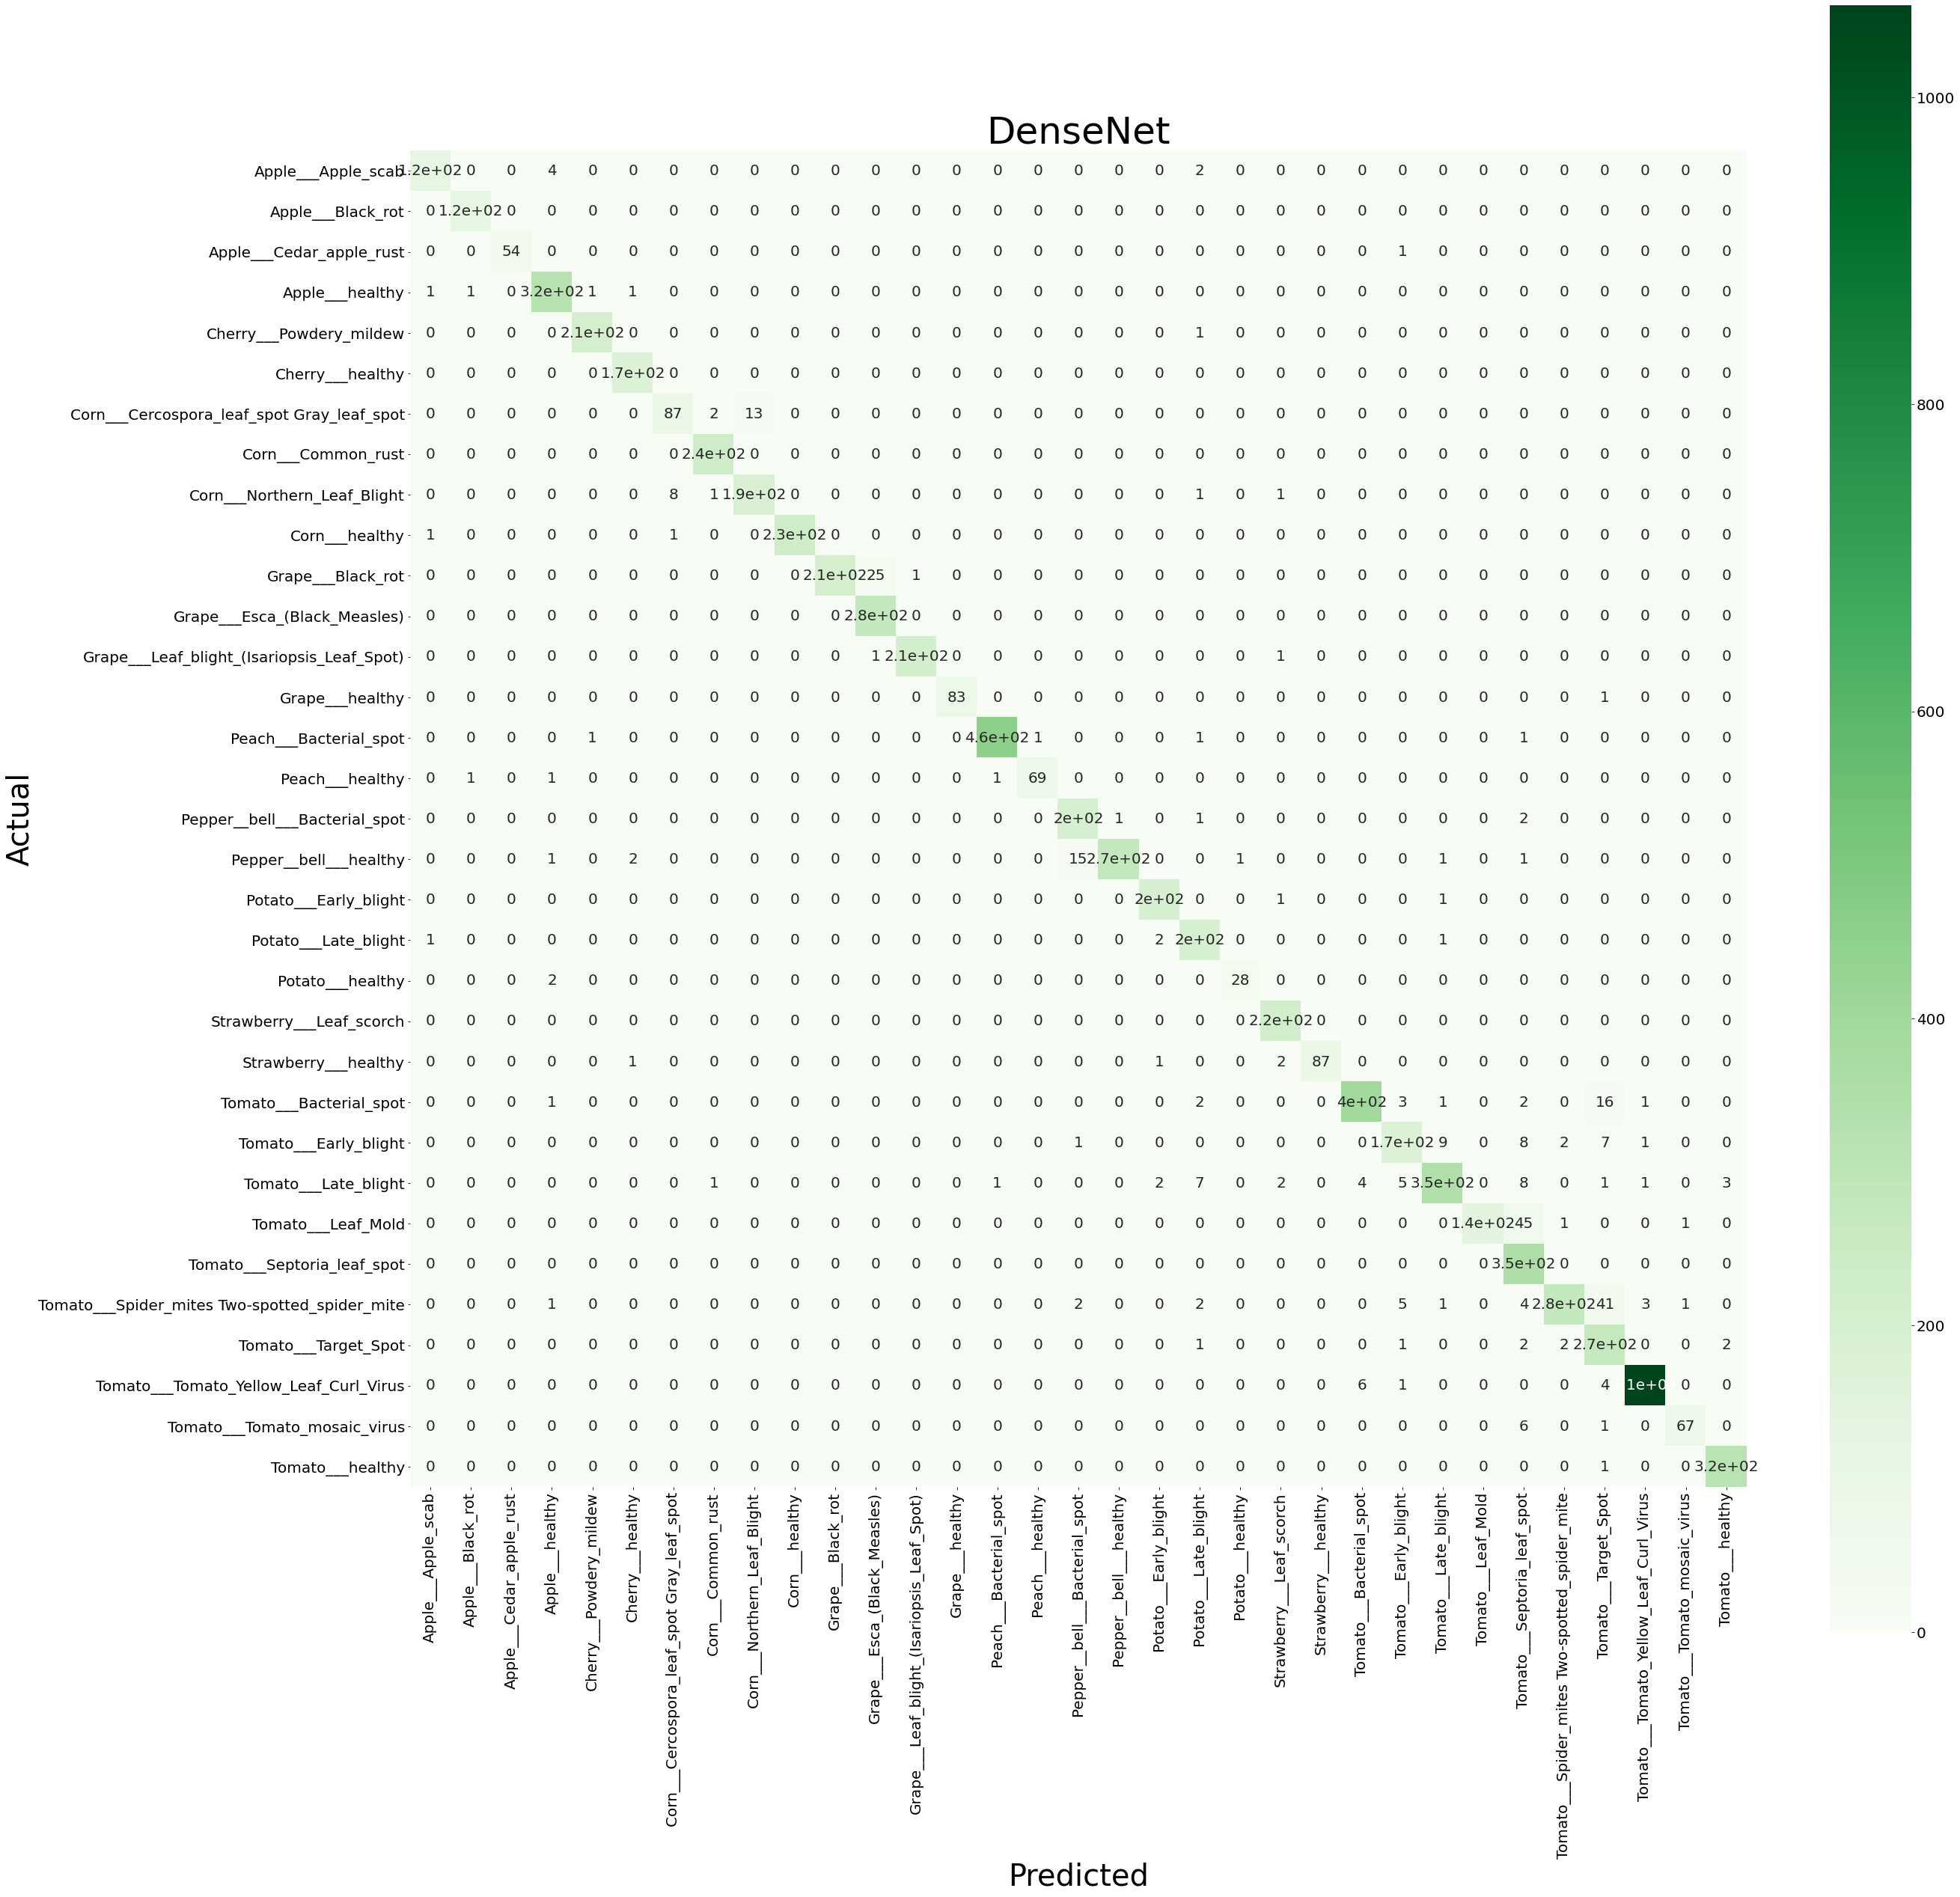

In [ ]:
y_pred5 = np.argmax(predict5, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(classes, y_pred5)
plt.figure(figsize=(40, 40))
ax5 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax5.set_title("DenseNet", fontsize=50)
ax5.set_ylabel('Actual', fontsize=40)
ax5.set_xlabel('Predicted', fontsize=40)

**Dense Freeze**

Text(0.5, 656.9999999999998, 'Predicted')

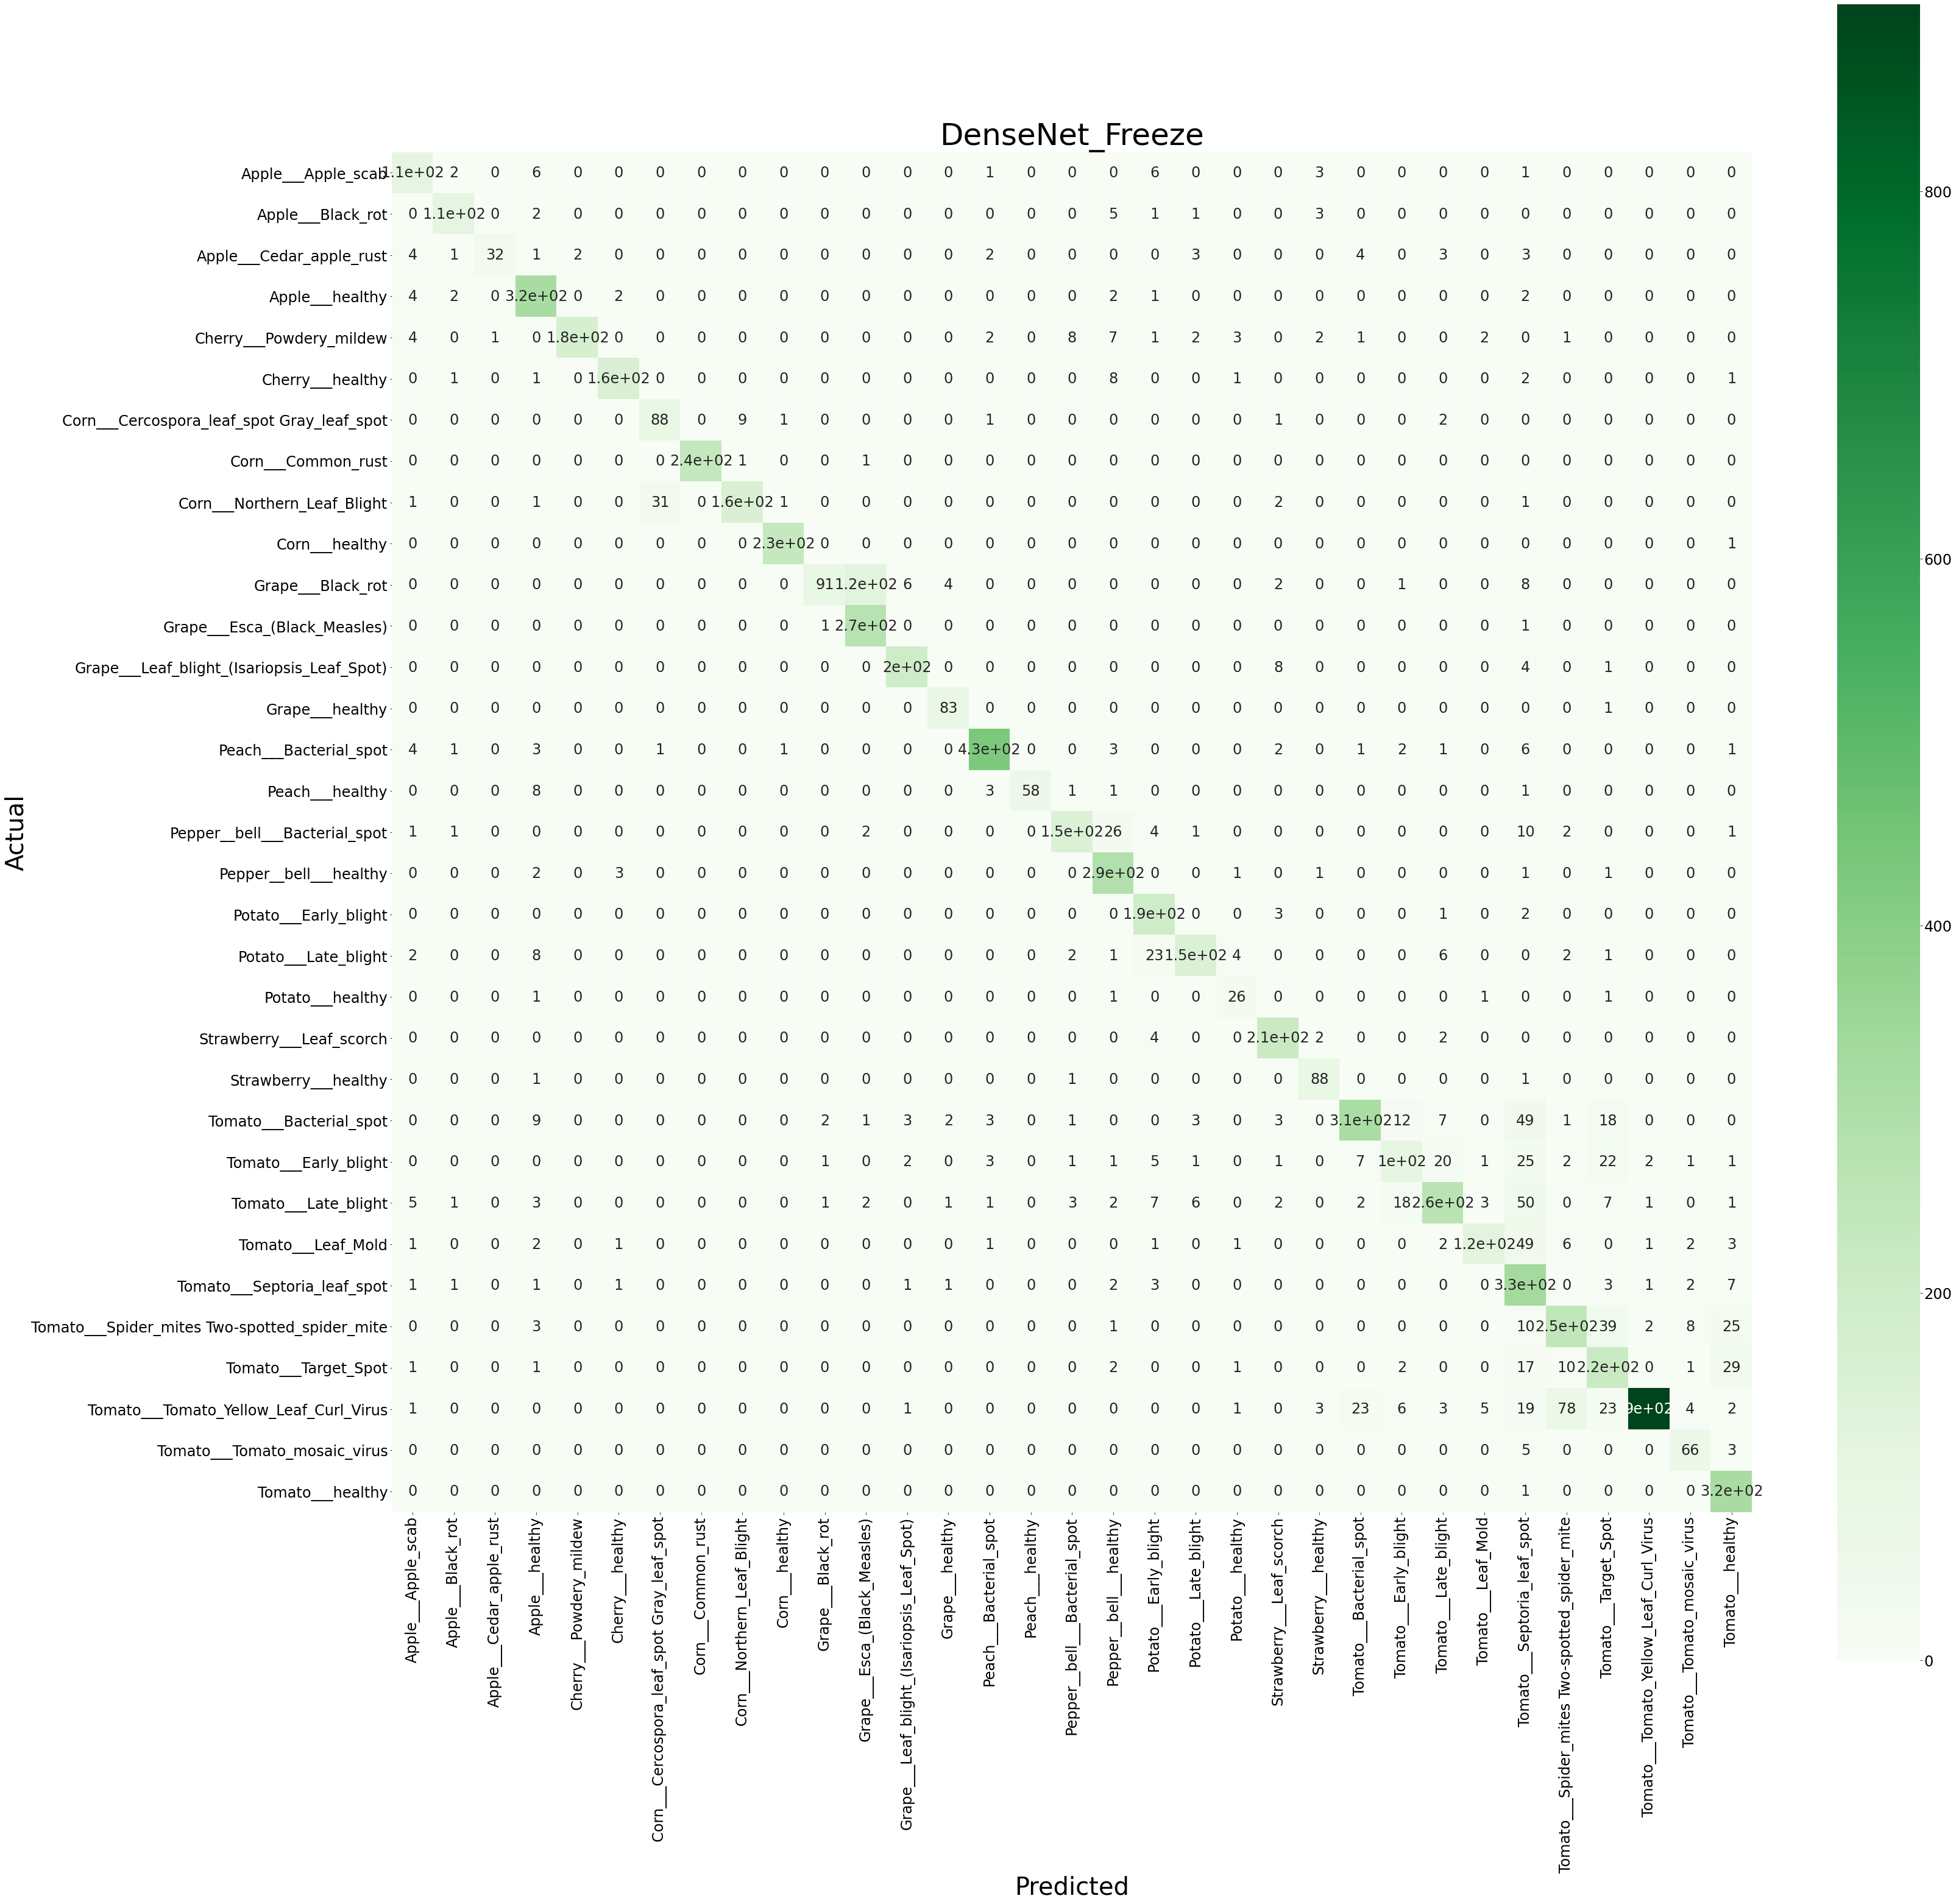

In [ ]:
y_pred6 = np.argmax(predict6, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 24})
cm = confusion_matrix(classes, y_pred6)
plt.figure(figsize=(50, 50))
ax6 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax6.set_title("DenseNet_Freeze", fontsize=50)
ax6.set_ylabel('Actual', fontsize=40)
ax6.set_xlabel('Predicted', fontsize=40)

# 성능 비교 (Baseline1, 2) (Augmentation vs. Raw)

**Train Data (Augmentated vs. Raw)의 시각화**

In [ ]:
dst_path1 = '/content/gdrive/My Drive/dataset_split_aug'
dst_path2 = '/content/gdrive/My Drive/dataset_split_raw_withoutaug'

train_dir1 = os.path.join(dst_path1, 'train')
train_dir2 = os.path.join(dst_path2, 'train')

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']

train_data1 = []
num1 = []
for defects_id, sp in enumerate(class_names):
    num1.append(len(os.listdir(os.path.join(train_dir1, sp))))
    for file in os.listdir(os.path.join(train_dir1, sp)):
        train_data1.append(['{}/{}'.format(sp, file), defects_id, sp])

train_data2 = []
num2 = []
for defects_id, sp in enumerate(class_names):
    num2.append(len(os.listdir(os.path.join(train_dir2, sp))))
    for file in os.listdir(os.path.join(train_dir2, sp)):
        train_data2.append(['{}/{}'.format(sp, file), defects_id, sp])


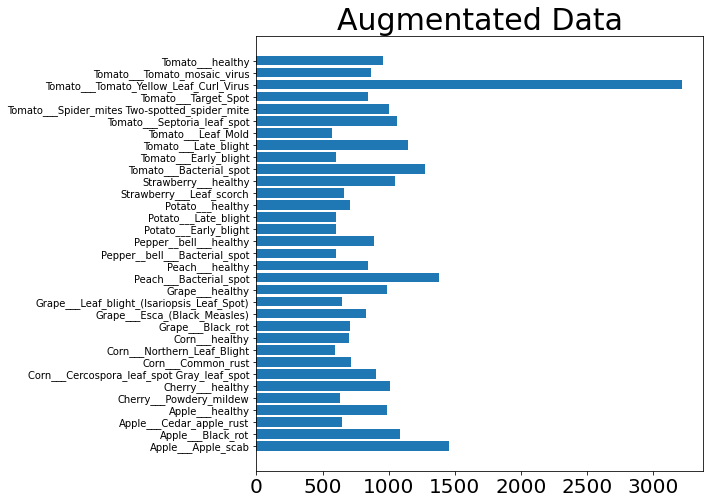

<Figure size 576x576 with 0 Axes>

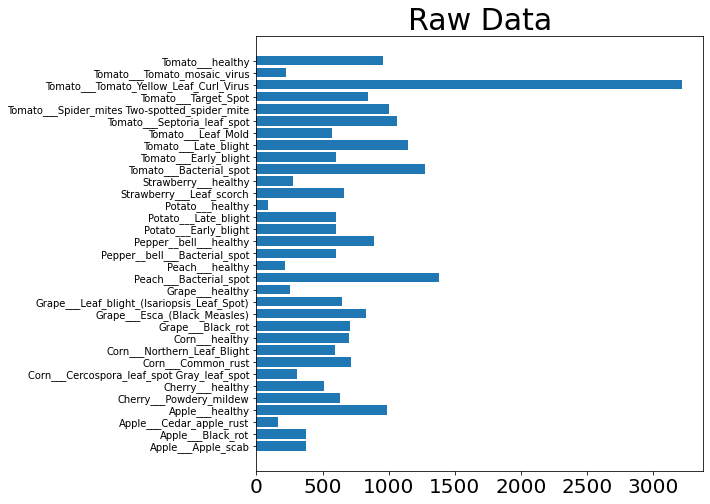

<Figure size 2592x2592 with 0 Axes>

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(8,8))
plt.barh(class_names, num1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title('Augmentated Data',fontsize=30)
plt.figure(figsize=(8, 8))
plt.show()

fig2 = plt.figure(figsize=(8,8))
plt.barh(class_names, num2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title('Raw Data',fontsize=30)
plt.figure(figsize=(36, 36))
plt.show()

## f1 score (class단위 & 전체 데이터)

Label Info.

In [ ]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Cherry___Powdery_mildew': 4,
 'Cherry___healthy': 5,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 6,
 'Corn___Common_rust': 7,
 'Corn___Northern_Leaf_Blight': 8,
 'Corn___healthy': 9,
 'Grape___Black_rot': 10,
 'Grape___Esca_(Black_Measles)': 11,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12,
 'Grape___healthy': 13,
 'Peach___Bacterial_spot': 14,
 'Peach___healthy': 15,
 'Pepper__bell___Bacterial_spot': 16,
 'Pepper__bell___healthy': 17,
 'Potato___Early_blight': 18,
 'Potato___Late_blight': 19,
 'Potato___healthy': 20,
 'Strawberry___Leaf_scorch': 21,
 'Strawberry___healthy': 22,
 'Tomato___Bacterial_spot': 23,
 'Tomato___Early_blight': 24,
 'Tomato___Late_blight': 25,
 'Tomato___Leaf_Mold': 26,
 'Tomato___Septoria_leaf_spot': 27,
 'Tomato___Spider_mites Two-spotted_spider_mite': 28,
 'Tomato___Target_Spot': 29,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 30,
 'Tomato___Tom

Baseline 1 (Augmented vs. Raw)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict1,axis=-1))) #aug
print(classification_report(classes, np.argmax(predict2,axis=-1))) #raw

score1 = loaded_model1.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline1 augmented's acc: ",score1[1])
score2 = loaded_model2.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline1 raw's acc: ",score2[1])

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       126
           1       0.88      0.85      0.86       124
           2       0.88      0.67      0.76        55
           3       0.89      0.88      0.89       329
           4       0.94      0.90      0.92       210
           5       0.96      0.96      0.96       170
           6       0.64      0.88      0.74       102
           7       0.99      0.99      0.99       238
           8       0.96      0.75      0.84       197
           9       0.99      1.00      0.99       232
          10       0.92      0.81      0.86       236
          11       0.88      0.93      0.90       276
          12       0.91      0.96      0.94       215
          13       0.86      0.94      0.90        84
          14       0.95      0.87      0.91       459
          15       0.76      0.94      0.84        72
          16       0.73      0.84      0.78       199
          17       0.89    

Baseline 2 (Augmented vs. Raw)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict3,axis=-1))) #aug
print(classification_report(classes, np.argmax(predict4,axis=-1))) #raw

score3 = loaded_model3.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline2 augmented's acc: ",score3[1])
score4 = loaded_model4.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline2 raw's acc: ",score4[1])

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       126
           1       0.79      0.81      0.80       124
           2       0.64      0.75      0.69        55
           3       0.90      0.74      0.82       329
           4       0.93      0.83      0.88       210
           5       0.95      0.85      0.89       170
           6       0.60      0.85      0.70       102
           7       0.97      0.97      0.97       238
           8       0.96      0.73      0.83       197
           9       0.99      0.98      0.98       232
          10       0.82      0.34      0.48       236
          11       0.59      0.97      0.73       276
          12       0.89      0.90      0.89       215
          13       0.83      0.76      0.80        84
          14       0.91      0.76      0.83       459
          15       0.82      0.94      0.88        72
          16       0.56      0.85      0.67       199
          17       0.83    

Dense (No Freeze vs. Freeze)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict5,axis=-1))) #DenseNet
print(classification_report(classes, np.argmax(predict6,axis=-1))) #DenseNet_Freeze

score5 = loaded_model5.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("DenseNet's acc: ",score5[1])
score6 = loaded_model6.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("Freezed DenseNet's acc: ",score6[1])

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       126
           1       0.98      1.00      0.99       124
           2       1.00      0.98      0.99        55
           3       0.97      0.99      0.98       329
           4       0.99      1.00      0.99       210
           5       0.98      1.00      0.99       170
           6       0.91      0.85      0.88       102
           7       0.98      1.00      0.99       238
           8       0.93      0.94      0.94       197
           9       1.00      0.99      1.00       232
          10       1.00      0.89      0.94       236
          11       0.91      1.00      0.96       276
          12       1.00      0.99      0.99       215
          13       1.00      0.99      0.99        84
          14       1.00      0.99      0.99       459
          15       0.99      0.96      0.97        72
          16       0.92      0.98      0.95       199
          17       1.00    

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict5,axis=-1))) #DenseNet
print(classification_report(classes, np.argmax(predict7,axis=-1))) #ResNet

score5 = loaded_model5.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("DenseNet's acc: ",score5[1])
score7 = loaded_model7.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("ResNet's acc: ",score7[1])

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       126
           1       0.98      1.00      0.99       124
           2       1.00      0.98      0.99        55
           3       0.97      0.99      0.98       329
           4       0.99      1.00      0.99       210
           5       0.98      1.00      0.99       170
           6       0.91      0.85      0.88       102
           7       0.98      1.00      0.99       238
           8       0.93      0.94      0.94       197
           9       1.00      0.99      1.00       232
          10       1.00      0.89      0.94       236
          11       0.91      1.00      0.96       276
          12       1.00      0.99      0.99       215
          13       1.00      0.99      0.99        84
          14       1.00      0.99      0.99       459
          15       0.99      0.96      0.97        72
          16       0.92      0.98      0.95       199
          17       1.00    